<a href="https://colab.research.google.com/github/VoTanThinh/TUAN05/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization 
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.models import load_model
import matplotlib.pyplot as plt  
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np     

In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/DATAFINAL/TRAIN',target_size=(200,200), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/AI/DATAFINAL/VALIDATION',target_size=(200,200 ), batch_size=32, class_mode='categorical')
training_set.class_indices
test_set.class_indices
     

Found 1249 images belonging to 5 classes.
Found 784 images belonging to 5 classes.


{'HOACUC': 0, 'HOAHONG': 1, 'HOAHUONGDUONG': 2, 'HOALY': 3, 'HOAMAI': 4}

In [ ]:
#tạo mô hình CNN sủ dụng tuần tự
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(200,200,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(512,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs=20, batch_size=64 ,verbose=1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc) 
print('hàm mất mát trên tập kiểm ta', test_loss) 

Epoch 1/20
40/40 [==============================] - 31s 741ms/step - loss: 1.6765 - accuracy: 0.5620
Epoch 2/20
40/40 [==============================] - 29s 729ms/step - loss: 0.8850 - accuracy: 0.6429
Epoch 3/20
40/40 [==============================] - 29s 731ms/step - loss: 0.6715 - accuracy: 0.7318
Epoch 4/20
40/40 [==============================] - 29s 734ms/step - loss: 0.5919 - accuracy: 0.7758
Epoch 5/20
40/40 [==============================] - 29s 717ms/step - loss: 0.5213 - accuracy: 0.8054
Epoch 6/20
40/40 [==============================] - 30s 744ms/step - loss: 0.4860 - accuracy: 0.8191
Epoch 7/20
40/40 [==============================] - 30s 744ms/step - loss: 0.4861 - accuracy: 0.8078
Epoch 8/20
40/40 [==============================] - 30s 725ms/step - loss: 0.4942 - accuracy: 0.8078
Epoch 9/20
40/40 [==============================] - 29s 730ms/step - loss: 0.3928 - accuracy: 0.8567
Epoch 10/20
40/40 [==============================] - 29s 732ms/step - loss: 0.3652 - accura

In [ ]:
#Lưu
from keras.models import load_model
model.save("CUOIKI.h5")
model_1=load_model('CUOIKI.h5')

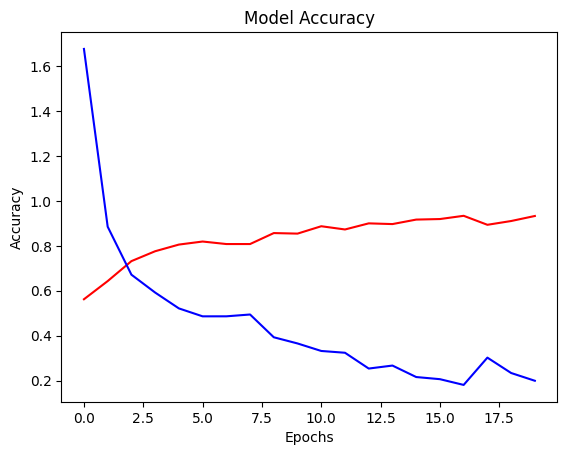

In [ ]:
# VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

1/1 [==============================] - 0s 137ms/step
HOACUC


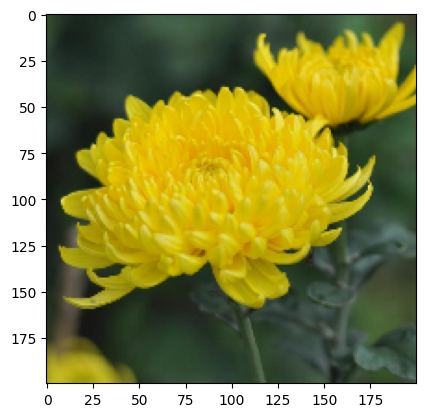

1/1 [==============================] - 0s 52ms/step
HOAMAI


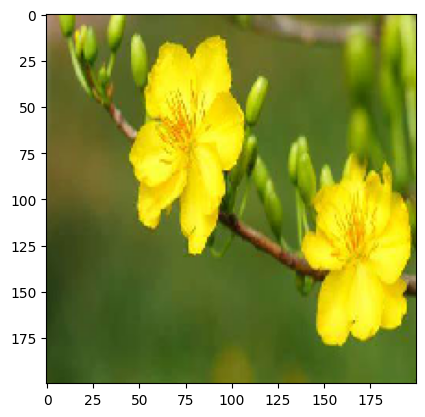

1/1 [==============================] - 0s 28ms/step
HOAHONG


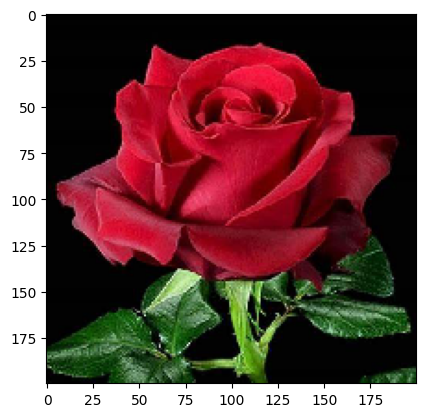

1/1 [==============================] - 0s 59ms/step
HOAHUONGDUONG


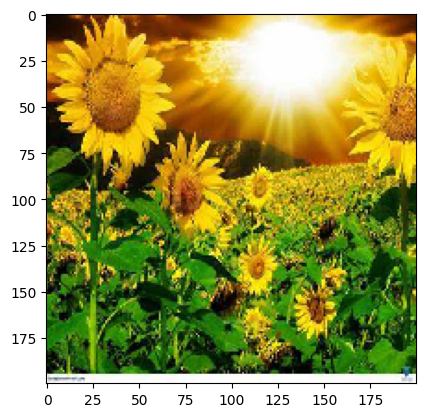

1/1 [==============================] - 0s 20ms/step
HOALY


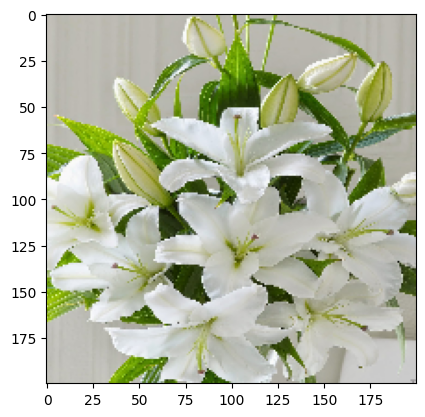

In [ ]:

test='/content/drive/MyDrive/AI/DATAFINAL/TEST'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(200,200))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['HOACUC','HOAHONG','HOAHUONGDUONG','HOALY', 'HOAMAI']
  print(class_name[result]) 
  plt.show()